# 1.Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import requests
import tweepy
import json
import re
import datetime
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
#!pip install tweepy

# Data wrangling

## Gathering

we have three different sources:
- enhanced twitter archive (.csv) which is downloaded manually
- Additional data via the twitter API(tweepy)
- Image predictions file 

### **enhanced twiiter archive**

[link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

In [2]:
os.listdir()   #printing the files in directory

['.ipynb_checkpoints',
 'Data wrangling report .pdf',
 'dataanalysisreport .pdf',
 'image-predictions.tsv',
 'image_predictions.csv',
 'plot.png',
 'plot1.png',
 'plot4.png',
 'plot6_1.png',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'Udacity-Project---Wrangling-and-analyzing-data-from-twitter-archives-master',
 'Wrangle_act.html',
 'Wrangle_act.ipynb']

In [3]:
data_archive_df=pd.read_csv('twitter-archive-enhanced.csv')
archive_df=data_archive_df.copy()

In [4]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
archive_df.tweet_id[2]               #this brings tweet_id in row index2

891815181378084864

### **Image Predictions file**
 
it is downloaded programmatically using [requests](https://pypi.org/project/requests/) library  from [this link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')
file_name

['https:',
 '',
 'd17h27t6h515a5.cloudfront.net',
 'topher',
 '2017',
 'August',
 '599fd2ad_image-predictions',
 'image-predictions.tsv']

In [6]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
response=requests.get(url)

In [7]:
response                          #this means the request is successful

<Response [200]>

In [8]:
if not os.path.isfile(file_name):     #response.content is in bytes but  it will be human readable
    with open(file_name,'wb') as file:
        file.write(response.content)

In [9]:
os.listdir()

['.ipynb_checkpoints',
 'Data wrangling report .pdf',
 'dataanalysisreport .pdf',
 'image-predictions.tsv',
 'image_predictions.csv',
 'plot.png',
 'plot1.png',
 'plot4.png',
 'plot6_1.png',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'Udacity-Project---Wrangling-and-analyzing-data-from-twitter-archives-master',
 'Wrangle_act.html',
 'Wrangle_act.ipynb']

In [10]:
data_image_predictions_df=pd.read_csv(os.listdir()[3],sep='\t')
image_predictions_df=data_image_predictions_df.copy()

In [11]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### **additional data via the twitter API**

[tweepy](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)

[json realpython](https://realpython.com/python-json/)

In [12]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [13]:
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id,wait_on_rate_limit=True,wait_on_rate_limit_notify=True, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [14]:
os.listdir()

['.ipynb_checkpoints',
 'Data wrangling report .pdf',
 'dataanalysisreport .pdf',
 'image-predictions.tsv',
 'image_predictions.csv',
 'plot.png',
 'plot1.png',
 'plot4.png',
 'plot6_1.png',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'Udacity-Project---Wrangling-and-analyzing-data-from-twitter-archives-master',
 'Wrangle_act.html',
 'Wrangle_act.ipynb']

In [15]:
df_list=[]
with open('tweet-json.txt','r') as f:
    for line in f:
    #data=f.readline()
        data = json.loads(line)
        Id=data['id']
        createdat=data['created_at']
        #IDstr=data['id_str']
        fulltext=data['full_text']
       # user=data['user']
        retweetcount=data['retweet_count']
        favouritecou=data['favorite_count']
        # favourite=data['favorited']
        #retweeted=data['retweeted']
        #possiblysensitive=data['possibly_sensitive']
        df_list.append({'id': Id,
                        'created at':createdat,
                       # 'id str': IDstr,
                         'full text':fulltext,
                           'retweetcount':retweetcount,
                           'favouritecount':favouritecou,
                           })   
 #break
 #'favourite':favourite,'retweeted':retweeted
dataapi_df = pd.DataFrame(df_list, columns = ['id', 'created at', 'full text','retweetcount','favouritecount'])  
api_df=dataapi_df.copy()
#print(df_list)
print(api_df.head()) 

                   id                      created at  \
0  892420643555336193  Tue Aug 01 16:23:56 +0000 2017   
1  892177421306343426  Tue Aug 01 00:17:27 +0000 2017   
2  891815181378084864  Mon Jul 31 00:18:03 +0000 2017   
3  891689557279858688  Sun Jul 30 15:58:51 +0000 2017   
4  891327558926688256  Sat Jul 29 16:00:24 +0000 2017   

                                           full text  retweetcount  \
0  This is Phineas. He's a mystical boy. Only eve...          8853   
1  This is Tilly. She's just checking pup on you....          6514   
2  This is Archie. He is a rare Norwegian Pouncin...          4328   
3  This is Darla. She commenced a snooze mid meal...          8964   
4  This is Franklin. He would like you to stop ca...          9774   

   favouritecount  
0           39467  
1           33819  
2           25461  
3           42908  
4           41048  


In [16]:
type(df_list)

list

In [17]:
df_list[0]    #viewing the content of first tweet

{'id': 892420643555336193,
 'created at': 'Tue Aug 01 16:23:56 +0000 2017',
 'full text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'retweetcount': 8853,
 'favouritecount': 39467}

In [18]:
print(data.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [19]:
for i in data.keys():
    print(i)

created_at
id
id_str
full_text
truncated
display_text_range
entities
extended_entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
possibly_sensitive_appealable
lang


In [20]:
data['retweet_count']

532

## Assessing:

### archive_df

In [21]:
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1660,683078886620553216,NaN,NaN,2016-01-02 00:14:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a nifty leaping pupper. Feet look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683078886...,9,10,None,None,None,pupper,None
1429,697596423848730625,NaN,NaN,2016-02-11 01:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with a piece of pizza. Two of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697596423...,11,10,None,None,None,pupper,None
117,870063196459192321,NaN,NaN,2017-05-31 23:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clifford. He's quite large. Also red. Goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,None,None,None,None
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Duke. He's an Urban Parmesan. They know h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [23]:
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = archive_df[(archive_df['doggo'] != 'None') & (archive_df['pupper'] != 'None')]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -5:].head()

,name,doggo,floofer,pupper,puppo
460,Dido,doggo,None,pupper,None
531,None,doggo,None,pupper,None
565,None,doggo,None,pupper,None
575,Bones,doggo,None,pupper,None
705,Pinot,doggo,None,pupper,None


In [24]:
archive_df.loc[:, 'doggo':"puppo"] != 'None'

,doggo,floofer,pupper,puppo
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2351,False,False,False,False
2352,False,False,False,False
2353,False,False,False,False
2354,False,False,False,False


In [25]:
#Check for the over all number of pets under each category
(archive_df.loc[:, 'doggo':"puppo"] != 'None').sum()    #hishoof true w y3ml sum 3lihom dol ely mwgood fihom stage

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [26]:
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_stage = archive_df[(archive_df['doggo'] != 'None') & (archive_df['pupper'] != 'None')]

# Extracting only those the columns of interest and investigate its head
nonunique_stage.iloc[:, -5:].head()

,name,doggo,floofer,pupper,puppo
460,Dido,doggo,None,pupper,None
531,None,doggo,None,pupper,None
565,None,doggo,None,pupper,None
575,Bones,doggo,None,pupper,None
705,Pinot,doggo,None,pupper,None


In [27]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
archive_df.shape

(2356, 17)

In [29]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### **checking for null values:**

In [30]:
archive_df.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [31]:
archive_df.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [32]:
archive_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

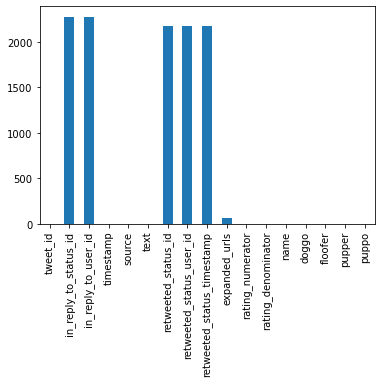

In [33]:
#visualizing the bar plot for missing values
archive_df.isna().sum().plot(kind='bar')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

**The high number of missing values(NaN) in 
In_reply_status_id, In_reply_user_id,retweeted_status_id, retweeted_user_id, retweeted_status_timestamp    indicates that most of our tweets are not retweets/replies**


#### **checking for duplicates**

In [34]:
archive_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [35]:
sum(archive_df.duplicated())             #There are no duplicates

0

**Define**

make timestamp datetime not an object and check its conversion using .info()

**Code**

In [36]:
archive_df['timestamp']=pd.to_datetime(archive_df['timestamp'])

**Test**

In [37]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

[link for replacing values](https://datatofish.com/replace-values-pandas-dataframe/)

**Define :**

empty values in last 4 columns[doggo:puppo] are represented with None it should be replaced with NaN 
first i replaced it with empty string then NaN

**Code**

In [38]:
#archive_df['doggo']=archive_df['doggo']
#archive_df['floffer']=archive_df['floffer']
#archive_df['pupper']=archive_df['pupper']
#archive_df['puppo']=archive_df['puppo']
#Replace a single value with a new value for an entire DataFrame:
#archive_df = archive_df.replace(['None'],'')
archive_df.iloc[:, -4:  ] = archive_df.iloc[:, -4:  ].replace('None','')

**Test**

In [39]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,,,
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,,,,
1104,735137028879360001,NaN,NaN,2016-05-24 15:55:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Buckley. His family &amp; some neighbors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735137028...,9,10,Buckley,,,pupper,
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,,,,
1845,675845657354215424,NaN,NaN,2015-12-13 01:12:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,,,pupper,


**>merging the four columns (doggo,floofer,pupper,puppo) in one column**

In [40]:
archive_df['dog_stage']=archive_df.doggo + archive_df.floofer + archive_df.pupper + archive_df.puppo

In [41]:
archive_df['dog_stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [42]:
archive_df['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

**code**

none values with empty string then NaN

[link](https://datatofish.com/replace-values-pandas-dataframe/)

In [43]:
archive_df['dog_stage'] = archive_df['dog_stage'].replace(['','doggopupper','doggopuppo','doggofloofer'],\
                                    [np.NaN,'doggo-pupper','doggo-puppo','doggo-floofer'])

**Test**

In [44]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
2195,668872652652679168,NaN,NaN,2015-11-23 19:24:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Amélie. She is a confident white colle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668872652...,11,10,Amélie,,,,,NaN
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,,,,,NaN
964,750506206503038976,NaN,NaN,2016-07-06 01:46:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,,,pupper,,pupper
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,,,pupper,,pupper
2010,672248013293752320,NaN,NaN,2015-12-03 02:56:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",10/10 for dog. 7/10 for cat. 12/10 for human. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672248013...,10,10,None,,,,,NaN


In [45]:
archive_df['dog_stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo-pupper      12
floofer            9
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [46]:
archive_df['dog_stage'].value_counts(dropna=False)

NaN              1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [47]:
#archive_df['dog_stage'].plot(kind='bar')

[dropping multiple columns](https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/)

**define**

tidiness issue:The last four columns’headers in  archive_df are variables we have  columns for dog_stage which violates this rule
    
**Code**    

**>dropping the columns that arenot important**

In [48]:
archive_df.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

**test**

In [49]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,NaN
1174,720059472081784833,NaN,NaN,2016-04-13 01:22:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charleson. He lost his plunger. Looked...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720059472...,9,10,Charleson,NaN
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,NaN
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,pupper
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN


In [50]:
archive_df[archive_df['name']== 'None'] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,NaN
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,NaN
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,NaN
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,NaN
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN


In [51]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
DayZ         1
Izzy         1
Rumble       1
Jeffri       1
Boston       1
Name: name, Length: 957, dtype: int64

some names are inaccurate

In [52]:
archive_df[archive_df['name']== 'None'].shape   #we have 745 rows that don't have names

(745, 14)

### image_predictions_df

In [53]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**define**

undescriptive column headers 

**code**

we rename the columns to be more desriptive

In [54]:
image_predictions_df=image_predictions_df.rename(columns={'p1':'first_prediction','p2':'second_prediction','p3':'third_prediction',
                                                 'p1_conf':'1st pred conf','p2_conf':'2nd pred conf','p3_conf':'3rd pred conf',
                             'p1_dog':'classif_out:1st_pred','p2_dog':'classif_out:2nd_pred','p3_dog':'classif_out:3rd_pred'})

**Test**

In [55]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,first_prediction,1st pred conf,classif_out:1st_pred,second_prediction,2nd pred conf,classif_out:2nd_pred,third_prediction,3rd pred conf,classif_out:3rd_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


[link for saving images](https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.04-Saving-Plots/#:~:text=Matplotlib%20plots%20can%20be%20saved,savefig()%20function.)

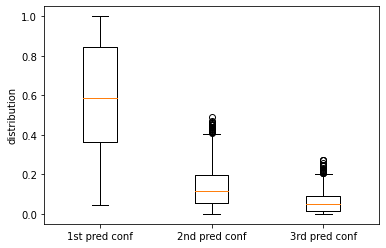

In [56]:
fig,ax=plt.subplots()
ax.boxplot([image_predictions_df['1st pred conf'],image_predictions_df['2nd pred conf'],image_predictions_df['3rd pred conf']])
ax.set_xticklabels(['1st pred conf','2nd pred conf','3rd pred conf'])
ax.set_ylabel('distribution')
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              2075 non-null   int64  
 1   jpg_url               2075 non-null   object 
 2   img_num               2075 non-null   int64  
 3   first_prediction      2075 non-null   object 
 4   1st pred conf         2075 non-null   float64
 5   classif_out:1st_pred  2075 non-null   bool   
 6   second_prediction     2075 non-null   object 
 7   2nd pred conf         2075 non-null   float64
 8   classif_out:2nd_pred  2075 non-null   bool   
 9   third_prediction      2075 non-null   object 
 10  3rd pred conf         2075 non-null   float64
 11  classif_out:3rd_pred  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [58]:
image_predictions_df['1st pred conf'].agg([min,max,np.mean])

min     0.044333
max     1.000000
mean    0.594548
Name: 1st pred conf, dtype: float64

In [59]:
image_predictions_df['2nd pred conf'].agg([min,max,np.mean])

min     1.011300e-08
max     4.880140e-01
mean    1.345886e-01
Name: 2nd pred conf, dtype: float64

In [60]:
image_predictions_df['3rd pred conf'].agg([min,max,np.mean])

min     1.740170e-10
max     2.734190e-01
mean    6.032417e-02
Name: 3rd pred conf, dtype: float64

In [61]:
image_predictions_df.describe()

,tweet_id,img_num,1st pred conf,2nd pred conf,3rd pred conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [62]:
image_predictions_df.shape

(2075, 12)

In [63]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction', '1st pred conf',
       'classif_out:1st_pred', 'second_prediction', '2nd pred conf',
       'classif_out:2nd_pred', 'third_prediction', '3rd pred conf',
       'classif_out:3rd_pred'],
      dtype='object')

**Define**

some tweets don't have images i tried to find the tweets that have imgs from image_predictions by thier ids

**Code**

In [64]:
ids=image_predictions_df['tweet_id']
print(type(ids))
ids2=list(image_predictions_df['tweet_id'])
print(ids2)

<class 'pandas.core.series.Series'>
[666020888022790149, 666029285002620928, 666033412701032449, 666044226329800704, 666049248165822465, 666050758794694657, 666051853826850816, 666055525042405380, 666057090499244032, 666058600524156928, 666063827256086533, 666071193221509120, 666073100786774016, 666082916733198337, 666094000022159362, 666099513787052032, 666102155909144576, 666104133288665088, 666268910803644416, 666273097616637952, 666287406224695296, 666293911632134144, 666337882303524864, 666345417576210432, 666353288456101888, 666362758909284353, 666373753744588802, 666396247373291520, 666407126856765440, 666411507551481857, 666418789513326592, 666421158376562688, 666428276349472768, 666430724426358785, 666435652385423360, 666437273139982337, 666447344410484738, 666454714377183233, 666644823164719104, 666649482315059201, 666691418707132416, 666701168228331520, 666739327293083650, 666776908487630848, 666781792255496192, 666786068205871104, 666804364988780544, 666817836334096384, 666

**>filtering the archive_df by tweet ids from image predictions df**


In [65]:
archive_df=archive_df[archive_df['tweet_id'].isin(ids2)]

**Test**

In [66]:
archive_df.shape

(2075, 14)

In [67]:
notretweet_entries=archive_df.retweeted_status_id.isna()    #NaN means itsn't retweet
notretweet_entries

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: retweeted_status_id, Length: 2075, dtype: bool

**Define**

Some tweets are actually retweets and replies not original tweets that have to be deleted 

**Code**

In [68]:
#throwback to the archive data set to find the tweets that include data in the retweets
retweet_entries=archive_df.retweeted_status_id.notnull()    #there are valuess indicating they are retweet
retweet_entries

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: retweeted_status_id, Length: 2075, dtype: bool

In [69]:
archive_df[notretweet_entries].shape[0]

1994

In [70]:
archive_df[retweet_entries].shape[0]

81

In [71]:
archive_df[~retweet_entries].shape[0]

1994

In [72]:
#dropping the retweets from archive data set
archive_df=archive_df[notretweet_entries]
#archive_df=archive_df[~retweet_entries]

In [73]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


**Test**

In [74]:
archive_df.shape

(1994, 14)

**Code**

In [75]:
notreply_entries=archive_df.in_reply_to_user_id.isna()    #NaN hna y3ni dh msh reply
notreply_entries

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: in_reply_to_user_id, Length: 1994, dtype: bool

In [76]:
#throwback to the archive data set to find the tweets that include data in the replies
reply_entries=archive_df.in_reply_to_user_id.notnull()    #it is a reply
reply_entries

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: in_reply_to_user_id, Length: 1994, dtype: bool

In [77]:
archive_df[reply_entries].shape[0]

23

In [78]:
archive_df[notreply_entries].shape[0]

1971

In [79]:
archive_df=archive_df[notreply_entries]

**Test**

In [80]:
archive_df.shape

(1971, 14)

In [81]:
#now we check the image prediction table for extra tweet ids that arenot in archive cleaned as they are retweets/replies
np.logical_not(image_predictions_df.tweet_id.isin(list(archive_df.tweet_id)))
image_predictions_df[~np.logical_not(image_predictions_df.tweet_id.isin(list(archive_df.tweet_id)))]

,tweet_id,jpg_url,img_num,first_prediction,1st pred conf,classif_out:1st_pred,second_prediction,2nd pred conf,classif_out:2nd_pred,third_prediction,3rd pred conf,classif_out:3rd_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [82]:
archive_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [83]:
archive_df.drop(['expanded_urls'],axis=1,inplace=True)
archive_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [84]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,first_prediction,1st pred conf,classif_out:1st_pred,second_prediction,2nd pred conf,classif_out:2nd_pred,third_prediction,3rd pred conf,classif_out:3rd_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [85]:
api_df.head()

,id,created at,full text,retweetcount,favouritecount
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,9774,41048


In [86]:
api_df.columns

Index(['id', 'created at', 'full text', 'retweetcount', 'favouritecount'], dtype='object')

In [87]:
api_df=api_df[api_df['id'].isin(list(archive_df['tweet_id']))]

In [88]:
api_df.head()

,id,created at,full text,retweetcount,favouritecount
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,9774,41048


In [89]:
api_df.shape

(1971, 5)

<AxesSubplot:>

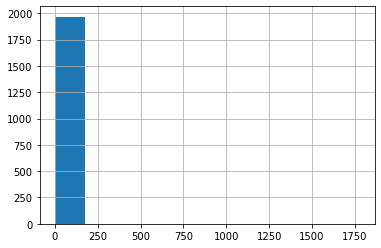

In [90]:
archive_df['rating_numerator'].hist(bins=10)

<AxesSubplot:title={'center':'rating denominator'}, ylabel='Frequency'>

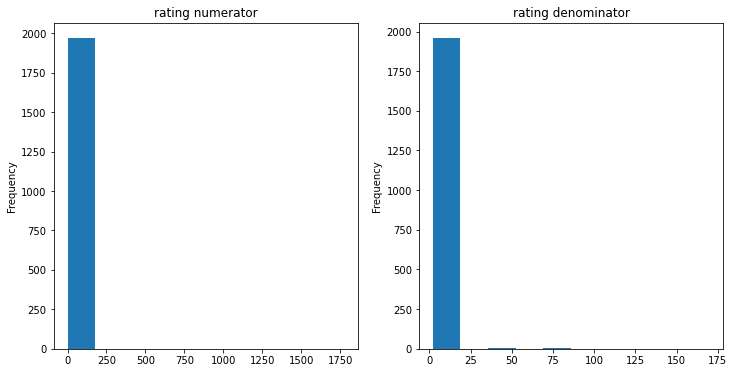

In [91]:
plt.figure(figsize = (12,6))
plt.subplot(121)
archive_df['rating_numerator'].plot.hist(title = 'rating numerator')
plt.subplot(122)
archive_df['rating_denominator'].plot.hist(title = 'rating denominator')

<AxesSubplot:title={'center':'rating numerator'}, ylabel='Frequency'>

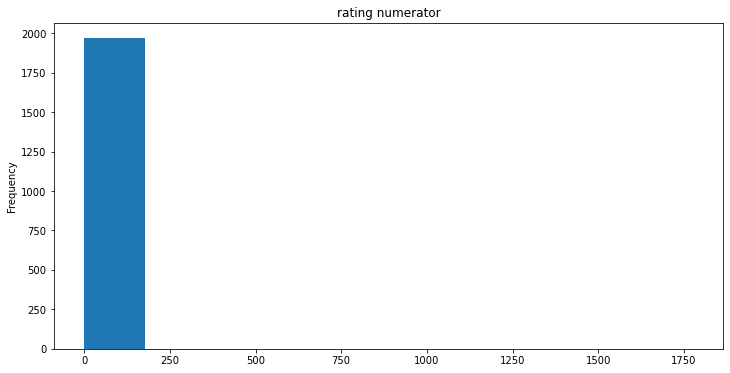

In [92]:
plt.figure(figsize = (12,6))
archive_df['rating_numerator'].plot.hist(title = 'rating numerator')

In [93]:
archive_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  121,   26,    2,  144,   88,    1,  420],
      dtype=int64)

In [94]:
archive_df['rating_denominator'].unique()    #below or above 10 is suspected

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 110, 120,
         2], dtype=int64)

In [95]:
#archive=archive_df[archive_df['rating_denominator']>10]

In [96]:
#archive.shape

In [97]:
#archive_df1=archive_df[archive_df['rating_denominator']==10]

In [98]:
#archive_df1.shape     #after removing the the unreasonable den

In [99]:
y=range(6,16)  #below 6 and above 15
y=list(y)
y

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [100]:
archive_df=archive_df[archive_df['rating_numerator'].isin(y)]

**Quality data issues** 
##### `archive_df` table
- id is integer not string
- timestamp is object not datetime 
- representation of null strings with none
- inaccurate data for numerator
- inaccurate data for name column 
- missing values in names dataframe
- some tweets are retweets or replies

##### `archive_df` and  `image-predictions_df'`table
- some tweets don't have images there is disperancy between two data frames

**tidiness issues**
##### `archive_df` table
-the column headers are variables (last four columns)
##### `archive_df` and `api_df` table
-tweet_id is available in two tables (single observational unit is available in two tables

In [101]:
archive_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [102]:
api_df.columns

Index(['id', 'created at', 'full text', 'retweetcount', 'favouritecount'], dtype='object')

In [103]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction', '1st pred conf',
       'classif_out:1st_pred', 'second_prediction', '2nd pred conf',
       'classif_out:2nd_pred', 'third_prediction', '3rd pred conf',
       'classif_out:3rd_pred'],
      dtype='object')

In [104]:
archive_df.shape

(1870, 8)

In [105]:
api_df.shape

(1971, 5)

**>filtering by ids from archive_df after removing some tweets that have in accurate numerator**

In [106]:
#ids=archive_df['tweet_id']
#print(type(ids))
ids=list(archive_df['tweet_id'])
#print(ids)

In [107]:
archive_df.shape

(1870, 8)

In [108]:
archive_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [109]:
archive_df=archive_df.reset_index(drop=True)

In [110]:
api_df=api_df[api_df['id'].isin(ids)]
api_df=api_df.reset_index(drop=True)
api_df.shape

(1870, 5)

In [111]:
image_predictions_df=image_predictions_df[image_predictions_df['tweet_id'].isin(ids)]
image_predictions_df.shape

(1870, 12)

**Define**

tidiness issue:One observational unit(tweet_id) is found in more than one table so I stored api_df and archive_df in one table and image_predictions in another table

**Code**

In [112]:
archive_df_master=pd.concat([archive_df,api_df],axis=1)
archive_df_master.shape

(1870, 13)

In [113]:
archive_df_master.drop(['id','timestamp','text'],axis=1,inplace=True)

**Test**

In [114]:
archive_df_master.shape

(1870, 10)

In [115]:
archive_df_master.columns

Index(['tweet_id', 'source', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created at', 'full text', 'retweetcount',
       'favouritecount'],
      dtype='object')

In [116]:
archive_df_master.groupby('dog_stage').favouritecount.mean()
#archive_df_master.groupby('dog_stage')['favouritecount'].mean()

dog_stage
doggo            19356.380952
doggo-floofer    17169.000000
doggo-pupper     14415.714286
doggo-puppo      47844.000000
floofer          13206.000000
pupper            7283.666667
puppo            21582.090909
Name: favouritecount, dtype: float64

In [117]:
avg_fav_stage = archive_df_master.groupby('dog_stage').favouritecount.mean()


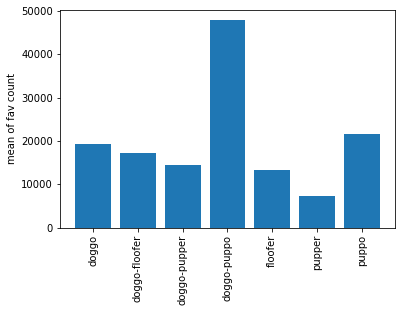

In [118]:
fig, ax= plt.subplots()
ax.bar(avg_fav_stage.index, avg_fav_stage)
ax.set_xticklabels(avg_fav_stage.index,rotation=90)
ax.set_ylabel('mean of fav count')
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()

In [119]:
archive_df_master.groupby('dog_stage').retweetcount.mean()

dog_stage
doggo             7125.698413
doggo-floofer     3433.000000
doggo-pupper      4844.714286
doggo-puppo      19196.000000
floofer           4968.714286
pupper            2393.075758
puppo             6473.954545
Name: retweetcount, dtype: float64

In [120]:
avg_ret_stage = archive_df_master.groupby('dog_stage').retweetcount.mean()

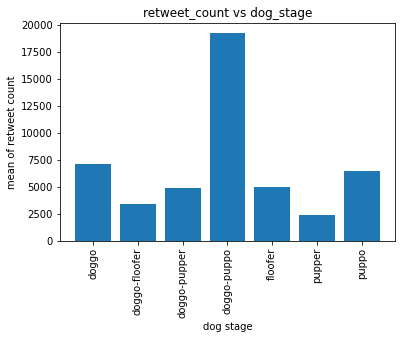

In [121]:
fig, ax= plt.subplots()
ax.bar(avg_ret_stage.index, avg_ret_stage)
ax.set_xticklabels(avg_ret_stage.index,rotation=90)
ax.set_ylabel('mean of retweet count')
ax.set_xlabel('dog stage')
ax.set_title('retweet_count vs dog_stage')
plt.savefig('plot6_1.png', dpi=300, bbox_inches='tight')
plt.show()

In [122]:
archive_df_master.columns

Index(['tweet_id', 'source', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created at', 'full text', 'retweetcount',
       'favouritecount'],
      dtype='object')

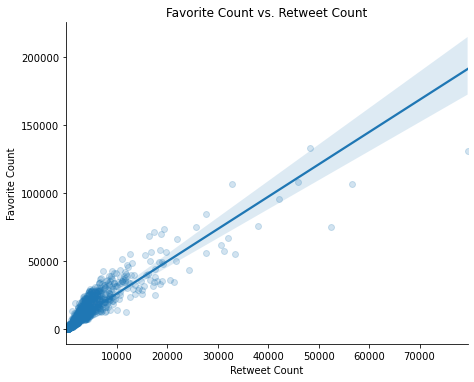

In [124]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweetcount", 
           y="favouritecount", 
           data=archive_df_master,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
plt.savefig('favorite vs retweet', dpi=300, bbox_inches='tight')

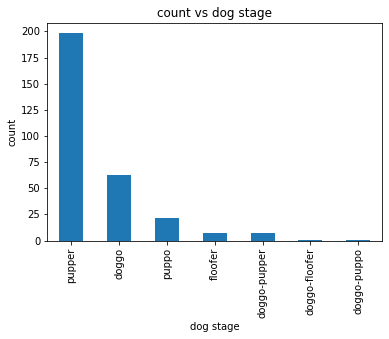

In [126]:
archive_df_master['dog_stage'].value_counts().plot(kind='bar')
plt.title('count vs dog stage')
plt.xlabel('dog stage')
plt.ylabel('count');
plt.savefig('count vs dogstage', dpi=300, bbox_inches='tight')

In [130]:
#archive_df_master.name.value_counts()[0:7].plot(kind='barh', figsize=(15,8), title='Most Common Dog Names');

In [131]:
archive_dfmastercopy=archive_df_master.copy
imagepredictionscopy=image_predictions_df.copy

In [132]:
archive_df_master.to_csv('twitter_archive_master.csv',index=False)
image_predictions_df.to_csv('image_predictions.csv',index=False)